<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Преобразование-признаков" data-toc-modified-id="Преобразование-признаков-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Преобразование признаков</a></span></li><li><span><a href="#Проблема-мультиколлинеарности" data-toc-modified-id="Проблема-мультиколлинеарности-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Проблема мультиколлинеарности</a></span></li><li><span><a href="#Сравнение-точности-моделей" data-toc-modified-id="Сравнение-точности-моделей-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Сравнение точности моделей</a></span></li></ul></li><li><span><a href="#Общие-выводы" data-toc-modified-id="Общие-выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общие выводы</a></span></li></ul></div>

# Проект: "Защита персональных данных клиентов"

__Описание проекта:__  

Нужно защитить данные клиентов страховой компании - разработать такой метод преобразования данных, чтобы по ним было бы сложно восстановить персональную информацию. Обосновать корректность его работы.

Нужно защитить данные так, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

__Этапы исследования:__  
- загрузка данных;
- изучение особенностей умножение матриц;
- разработка алгоритма преобразования признаков;
- проверка алгоритма.

__Описание данных:__      
- _Предсазательные признаки:_ пол, возраст и зарплата застрахованного, количество членов его семьи.
- _Целевой признак:_ количество страховых выплат клиенту за последние 5 лет.

## Загрузка данных

Загрузим и изучим данные.

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from collections import OrderedDict


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
# чтение файла данных в датафрейм из папки по умолчанию и из рабочей директории
try:
    data = pd.read_csv('/datasets/insurance.csv', sep=',')
except:
    data = pd.read_csv('insurance.csv', sep=',')

In [3]:
# обзор данных
data

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


In [4]:
# выяснение типов данных и наличие пропусков
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
# статистика по данным
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


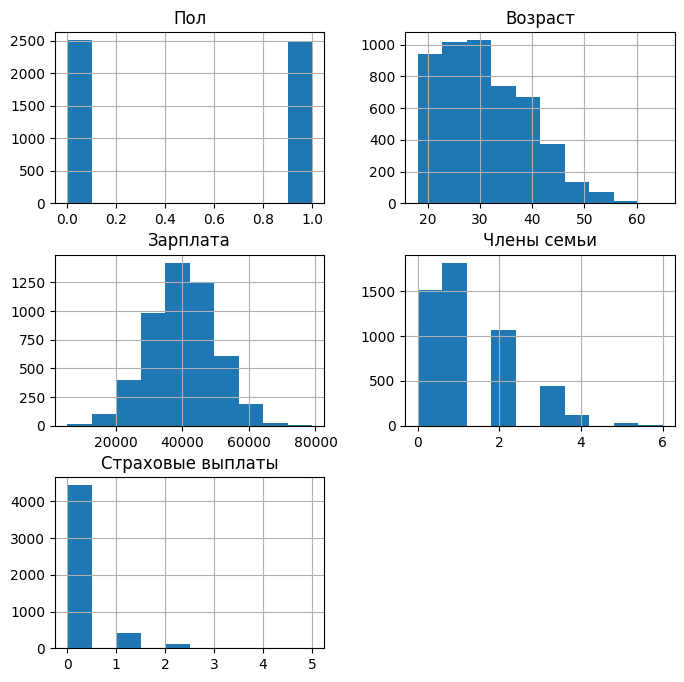

In [6]:
# гистограммы необработанных данных
data.hist(figsize=(8, 8));

In [7]:
# поиск дубликатов
data.duplicated().sum()

153

In [8]:
# удаление дубликатов
data.drop_duplicates(inplace=True)

In [9]:
# оценка линейной зависимости данных
data.corr().style.background_gradient(cmap='tab20')

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.000000,0.001953,0.015456,-0.007315,0.011565
Возраст,0.001953,1.000000,-0.017386,-0.009064,0.654964
Зарплата,0.015456,-0.017386,1.000000,-0.031687,-0.013123
Члены семьи,-0.007315,-0.009064,-0.031687,1.000000,-0.039303
Страховые выплаты,0.011565,0.654964,-0.013123,-0.039303,1.000000


__Результаты обзора данных:__  
Первичное исследование данных не выявило в них каких-либо проблем за исключением наличия немногочисленных дубликатов. Данные не нуждаются в предобработке и могут быть использованы в построении моделей машинного обучения или в операциях с матрицами.

## Умножение матриц

Для начала ответим на следующий вопрос и обоснуем решение.

__Вопрос:__  
Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)  
- _a._ __Изменится.__ Приведите примеры матриц.
- _b._ __Не изменится.__ Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:**  
_b._ __Не изменится.__ Если умножить признаки на обратимую матрицу, то качество линейной регрессии не измениться, так как новые признаки будут являться линейной комбинацией прежних.

**Обоснование:**  
Важным условием любого преобразования признакового пространства является сохранение информации в строках. То есть признаки в строках могут быть линейной комбинацией других признаков из той же строки, при этом ко всем строкам применяется одно и тоже линейное преобразование. В простейшем случае это может быть просто умножение на число или сложение с числом.

  $$
     \begin{bmatrix}
         a_{11} & a_{12} & \cdots & a_{1n}\\
         a_{21} & a_{22} & \cdots & a_{2n}\\ 
         \vdots & \vdots & \ddots & \vdots\\ 
         a_{m1} & a_{m2} & \cdots & a_{mn} 
     \end{bmatrix}
     \times
     \begin{bmatrix}
         b_{11} & b_{12} & \cdots & b_{1p}\\
         b_{21} & b_{22} & \cdots & b_{2p}\\ 
         \vdots & \vdots & \ddots & \vdots\\ 
         b_{n1} & b_{n2} & \cdots & b_{np} 
     \end{bmatrix}
      =
     \begin{bmatrix}
         c_{11} & c_{12} & \cdots & c_{1p}\\
         c_{21} & c_{22} & \cdots & c_{2p}\\ 
         \vdots & \vdots & \ddots & \vdots\\ 
         c_{m1} & c_{m2} & \cdots & c_{mp} 
     \end{bmatrix}
  $$
  $$ c_{ij}= a_{i1} b_{1j} + a_{i2} b_{2j} +\cdots+ a_{in} + b_{nj} = \sum_{k=1}^n a_{ik}b_{kj} $$  

Другими словами важен порядок перемножения матриц, и соблюдение указанного условия возможно при _умножении признаков на матрицу преобразования_ - то есть, умножение типа $X_{m \times n} \cdot P_{n \times n}$. Обратим внимание ранг матрицы признаков $rank X = n$ должен совпадать с рангом матрицы домножения. Эту матрицу целесообразно сделать квадратной для сохранения исходной размерности признакового пространства.

Альтернативный способ перемножения матриц $P_{m \times m} \cdot X_{m \times n}$ возможен только при реализации следующего подхода: матрица признаков сначала транспонируется, а потом результат умножения матриц транспонируется снова - то есть, используется преобразование типа $(P_{m \times m} X_{m \times n}^T)^T$.

Рассмотрим более простой - первый способ - более подробно. Для начала посмотрим, как измениться вектор весов при умножении матрицы признаков $X$ на произвольную обратимую матрицу $P$.

$$
w_P = ((XP)^T XP)^{-1} (XP)^T y
$$

Обратная матрица от произведения матриц раскрывается по следующему правилу: $(AB)^{-1} = B^{-1} A^{-1}$. Так как обратимыми являются только квадратные матрицы, то сначала раскроем все скобки внутри обратной матрицы $((XP)^T XP)^{-1}$, а затем перегруппируем множители. Транспонированная матрица $(XP)^T$ раскрывается тем же способом, что и обратная.

$$
w_P = (P^T(X^T XP))^{-1} P^T X^T y = (X^T XP)^{-1} (P^T)^{-1} P^T X^T y
$$

Перемножение $P^T$ на свою обратную матрицу даёт единичную матрицу $E$ - исключим её из выражения -  умножение на неё не меняет конечный результат. От раскрытия обратной матрицы мы ничего не выгадаем, поэтому просто домножим обе части выражения на матрицу $(X^T X)P$ и избавимся от обратной матрицы в правой части.

$$
X^T XP w_P = X^T y
$$

Сократим $X^T$ слева в обеих частях выражения и получим конечное выражение целевого признака $y$ через вектор весов преобразованного пространства признаков.
$$
XP w_P = y
$$

Подобным же образом выведем $y$ и из изначальной матрицы признаков.

$$
w = (X^T X)^{-1} X^T y
$$

$$
X^T X w = X^T y
$$

После домножения обеих частей на матрицу $X^T X$ и отбрасывания матрицы $X^T$ получим:

$$
X w = y
$$
Приравняем выражения.

$$
XPw_P \equiv Xw 
$$

Сократим слева обе половины выражения на $X$ и домножим на обратную матрицу $P^{-1}$. Получаем выражение преобразованного вектора весов через вектор весов оригинальной матрицы признаков.

$$
w_P = P^{-1} w
$$

Вывод полученной зависимости можно и сократить. В формуле для вектора весов фигурирует _псевдообратная матрица_. Запишем оба выражения для векторов весов более компактно:

$$
w = X^+y ,\ w_P = (XP)^+y
$$

Теперь посмотрим как связаны между собой векторы весов линейной регрессии для исходного и преобразованного пространства признаков. Для этого раскроем псевдобратную матрицу от произведения матриц по следующему правилу: $(AB)^+ = B^+ A^+$.

$$
w_P = P^+ X^+ y
$$

Для невырожденной квадратной матрицы обратная и псевдообратная матрицы совпадают. Таким образом мы видим, что:

$$
w_P = P^{-1} X^+ y = P^{-1} w
$$ 

В приведенных формулах для определения весов линейной регрессии вектор _целевого признака_ $y$ остается неизменным до и после умножения _объясняющих признаков_ $X$ на _матрицу_ $P$. Для сохранения результата точности прогноза по $R^2$ для измененного пространства признаков _предсказанные значения_ $a$ также не должны меняться.

$$
R^2 = 1 - \frac {\sum_{i=1}^n {(y_i - \hat y_i)^2}} {\sum_{i=1}^n {(y_i - \bar y)^2}}
$$

Таким образом необходимо доказать, что изменение признакового пространства при неизменности целевого признака не ведет к изменению прогноза. То есть, убедиться в справедливости тождества $a \equiv a_P$.

Запишем в формулу весов с учетом выявленных закономерностей.

$$
a_P = XPw_P = XPP^{-1} w
$$

Умножение матрицы $P$ на свою обратную матрицу дает единичную матрицу и мы получаем, что $a_P = Xw$. Таким образом, мы окончательно убеждаемся в том, что изменения в признаковом пространстве полностью компенсируются изменениями в векторе весов и   доказываем тождество:

$$
a \equiv a_P
$$

## Алгоритм преобразования

Предложим алгоритм преобразования данных для решения задачи. Обоснуем, почему качество линейной регрессии не поменяется.

Алгоритм преобразования данных состоит из трех этапов:  
1. выделение объясняющих признаков в массив с добавлением столбца единичных значений в начальную колонку;
2. генерирование квадратной матрицы преобразования с размером, соответствущем рангу матрицы признаков;
3. проверка обратимости полученной матрицы (детерминант не должен равняться нулю $\det P \neq 0$);
4. умножение матрицы признаков на матрицу преобразования.

__Обоснование:__   
В алгоритме преобразования использован способ перемножения матриц, не нарушающий структуру таблицы - в строках продолжают оставаться данные клиентов, но в виде линейной комбинации признаков. Сами клиенты все также могут быть идентифицированы по индексу таблицы. Изменение пространства признаков компенсируется изменением вектора весов. Ответы линейной регрессии сохраняются прежними, что было убедительно доказано ранее. И поскольку и целевой признак и прогнозы не меняются, то и значение метрики качества прогноза также не измениться.

__Дополнительное пояснение:__   
В алгоритме преобразования  присутствует аспект, требующий уточнения. Первый столбец матрицы признаков отведен под фиктивный признак, он заполняется единицами и отвечает за сдвиг прогноза (фактически, это сумма сдвигов прогнозов по отдельным признакам).  Изначально этот столбец в признаках отсутствует и возникает вопрос когда его добавлять и какое влияние он оказывает на прогноз. Возможны следующие варианты добавления: 1) единичный столбец добавляется в матрицу признаков и затем расширенная матрица признаков умножается на матрицу преобразования; 2) матрица признаков перемножается с матрицей преобразования и затем к этому добавляется единичный столбец.   Проведем натурный эксперимент и посмотрим, влияет ли способ добавления единичного столбца на результат прогноза. Данные будут случайными, результаты будут сравниваться с результатами на нетрансформированных данных.

In [10]:
# генерация состояния для создания матрицы преобразования
rng = np.random.default_rng(seed=42)
# образцы данных для объясняющих признаков, целевого признака и матрицы преобразования
features_example = rng.integers(1,100, (4,2))
p2_example = rng.integers(1,100, (2,2))
p3_example = rng.integers(1,100, (3,3))
target_example = rng.integers(1,10, (4,1))
target_example

array([[4],
       [2],
       [9],
       [8]], dtype=int64)

In [11]:
# трансформация после добавления единичного столбца
x1_example = np.column_stack((np.ones([4,1]), features_example))
w1p_example = np.linalg.pinv(x1_example @ p3_example) @ target_example
a1p_example = x1_example @ p3_example @ w1p_example
a1p_example

array([[6.64225455],
       [2.35329022],
       [8.41811023],
       [5.586345  ]])

In [12]:
# добавления единичного столбца после трансформации
xp = features_example @ p2_example
xp1_example = np.column_stack((np.ones([4,1]), xp))
wp1_example = np.linalg.pinv(xp1_example) @ target_example
ap1_example = xp1_example @ wp1_example
ap1_example

array([[6.64225455],
       [2.35329022],
       [8.41811023],
       [5.586345  ]])

In [13]:
# без трансформации
w1_example = np.linalg.pinv(x1_example) @ target_example
a1_example = x1_example @ w1_example
a1_example

array([[6.64225455],
       [2.35329022],
       [8.41811023],
       [5.586345  ]])

In [14]:
# трансформация без добавления единичного столбца
xp = features_example @ p2_example
wp_example = np.linalg.pinv(xp) @ target_example
ap_example = xp @ wp_example
ap_example

array([[6.9501059 ],
       [2.99901735],
       [7.22716395],
       [6.30498546]])

In [15]:
# без трансформации и без добавления единичного столбца
w_example = np.linalg.pinv(features_example) @ target_example
a_example = features_example @ w_example
a_example

array([[6.9501059 ],
       [2.99901735],
       [7.22716395],
       [6.30498546]])

Из результатов нашего эксперимента видим, что добавление единичного столбца до или после преобразования данных не влияет на прогноз. В обоих случаях он в точности совпадает с прогнозом на исходных данных. При этом отсутствие фиктивного признака в данных существенно ухудшает на результат прогноза.  
Таким образом, мы установили, что нет необходимости добавлять единичный столбец при трансформации данных - он может быть добавлен уже на этапе прогноза самой моделью линейной регрессии.

## Проверка алгоритма

Запрограммируем предложенный алгоритм, применив матричные операции. Проверим, что качество линейной регрессии из `sklearn` не отличается до и после преобразования с помощью метрику $R^2$.

### Преобразование признаков

При создании изменённого пространства признаков мы предполагали добавить перед преобразованием в матрицу признаков единичный столбец под фиктивный признак, отвечающий за сдвиг прогноза. Однако, после проведения натурных экспериментов необходимость в этом отпала.

In [16]:
# функция генерации обратимой матрицы
def get_rand_matrix(rank):
    det = 0
    # проверка определителя матрицы
    while det == 0:
        matrix = np.random.normal(size=(rank, rank))        
        det = np.linalg.det(matrix)
    return matrix

In [17]:
# создание матрицы преобразования
P = get_rand_matrix(len(data.columns) - 1)
P_inv = np.linalg.inv(P)
# массив признаков с колонкой из единиц
X = np.array(data.drop('Страховые выплаты', axis=1))
y = np.array([data['Страховые выплаты']]).T
# преобразованный массив признаков
XP = X @ P
# создание датафрейма с сохранением прежнего индекса и добавлением столбца целевого признака
data_xp = pd.DataFrame(np.column_stack((XP, y)), index=data.index)
data_xp

,0,1,2,3,4
0,52787.691062,40904.595579,12137.631006,59278.576668,0.0
1,40454.743951,31339.600720,9296.934488,45393.018031,1.0
2,22359.393722,17319.922399,5136.054124,25079.466274,0.0
3,44368.099325,34387.562748,10209.996857,49860.041795,0.0
4,27783.131416,21525.324277,6384.265347,31181.944072,0.0
...,...,...,...,...,...
4995,37993.313056,29440.586545,8739.308359,42670.462255,0.0
4996,55758.505399,43212.837577,12825.568061,62640.466905,0.0
4997,36071.883119,27955.454292,8300.245581,40529.458064,0.0
4998,34798.877248,26965.538722,8006.904853,39090.663236,0.0


Попробуем восстановить информацию о клиентах домножив закодированные признаки на обратную матрицу преобразования $P^{-1}$.

In [18]:
# восстановленные данные
XP @ P_inv

array([[ 1.00000000e+00,  4.10000000e+01,  4.96000000e+04,
         1.00000000e+00],
       [-4.23783897e-12,  4.60000000e+01,  3.80000000e+04,
         1.00000000e+00],
       [-1.24682837e-12,  2.90000000e+01,  2.10000000e+04,
         3.10442081e-13],
       ...,
       [-3.07215032e-12,  2.00000000e+01,  3.39000000e+04,
         2.00000000e+00],
       [ 1.00000000e+00,  2.20000000e+01,  3.27000000e+04,
         3.00000000e+00],
       [ 1.00000000e+00,  2.80000000e+01,  4.06000000e+04,
         1.00000000e+00]])

In [19]:
# исходные данные
X

array([[1.00e+00, 4.10e+01, 4.96e+04, 1.00e+00],
       [0.00e+00, 4.60e+01, 3.80e+04, 1.00e+00],
       [0.00e+00, 2.90e+01, 2.10e+04, 0.00e+00],
       ...,
       [0.00e+00, 2.00e+01, 3.39e+04, 2.00e+00],
       [1.00e+00, 2.20e+01, 3.27e+04, 3.00e+00],
       [1.00e+00, 2.80e+01, 4.06e+04, 1.00e+00]])

Поверхностный визуальный осмотр данных показывает, что восстановленные данные не отличаются от изначальных. Возможные незначительные отклонения связаны только с особенностями вычисления или записи данных.

### Проблема мультиколлинеарности

Как уже упоминалось ранее новые признаки являются линейной комбинацией прежних, а значит они могут быть подвержены явлению мультиколлинеарности. Проверим так ли это и насколько это явление влияет на результат прогнозов.

In [20]:
# оценка линейной зависимости данных
data_xp.corr().style.background_gradient(cmap='tab20')

,0,1,2,3,4
0,1.000000,1.000000,0.999999,0.999998,-0.012659
1,1.000000,1.000000,0.999999,0.999999,-0.013051
2,0.999999,0.999999,1.000000,1.000000,-0.013639
3,0.999998,0.999999,1.000000,1.000000,-0.013859
4,-0.012659,-0.013051,-0.013639,-0.013859,1.000000


Среди объясняющих признаков имеется значительно число признаков имеющих сильную линейную зависимость между собой. Если такие признаки еще и сильно коррелированны с целевым признаком появляется мультиколлинеарность и прогноз моделей по таким признакам становиться неустойчивым. Но это не наш случай - объясняющие признаки слабо коррелированны с целевым. Стоит заметить, что различие в корреляции среди признаков уменьшилось, однако лидеры не поменялись.  
Оценим наличие проблемы мультиколлинеарности с помощью и коэффициента инфляции дисперсии _(VIF)_. Расчетная формула этого коэффициента для отдельного регрессора:

$$ VIF_i = \frac {1} {1 - R{^2}{_i}} $$
где:
- $R{^2}{_i}$ - коэффициент детерминации.  

Коэффициент будем рассчитывать по каждому отдельному признаку. Пороговым значением,  при котором мультиколлинеарность становится явно выражена, обычно принимается значение около 10.

In [21]:
# часть объясняющих признаков исходного датасета
features_to_vif = list(data.columns)[:4]
data_to_vif = StandardScaler().fit_transform(data[features_to_vif])
for i in range(len(features_to_vif)):
    # расчет vif для отдельных признаков
    vif = variance_inflation_factor(data_to_vif, i)
    print(f'Коэффициент инфляции дисперсии (VIF) для признака "{features_to_vif[i]}" равен {int(vif)}.')

Коэффициент инфляции дисперсии (VIF) для признака "Пол" равен 1.
Коэффициент инфляции дисперсии (VIF) для признака "Возраст" равен 1.
Коэффициент инфляции дисперсии (VIF) для признака "Зарплата" равен 1.
Коэффициент инфляции дисперсии (VIF) для признака "Члены семьи" равен 1.


In [22]:
# часть объясняющих признаков преобразованного датасета
features_to_vif = list(data_xp.columns)[:4]
data_to_vif = StandardScaler().fit_transform(data_xp[features_to_vif])
for i in range(len(features_to_vif)):
    # расчет vif для отдельных признаков
    vif = variance_inflation_factor(data_to_vif, i)
    # порог значимости равен 10
    print(f'Коэффициент инфляции дисперсии (VIF) для признака "{features_to_vif[i]}" равен {int(vif)}.')

Коэффициент инфляции дисперсии (VIF) для признака "0" равен 264232253.
Коэффициент инфляции дисперсии (VIF) для признака "1" равен 525535688.
Коэффициент инфляции дисперсии (VIF) для признака "2" равен 22216793.
Коэффициент инфляции дисперсии (VIF) для признака "3" равен 126631164.


Как видим значения _VIF_ очень сильно превышает пороговое. Налицо мультиколлинеарность. Проверим насколько она влияет на качество прогноза и попробуем исключить из обучения часть признаков.  

Алгоритм отбора признаков:  
1. отсортируем признаки по степени корреляции; 
2. добавим первый по значимости признак в список для обучения; 
3. посчитаем коэффициент детерминации $R^2$; 
4. добавим следующий и снова посчитаем $R^2$ - как только она перестанет увеличиваться прекратим отбор.

In [23]:
# функция получения отсортированных значений корреляции для объясняющих признаков
def corrs_sorted(data, feature_name, target_name):
    corrs = {}
    for col in feature_name:
        # знак корреляции не учитывается
        corrs[col] = abs(data[target_name].corr(data[col]))          
    # словарь отсортированных значений корреляции
    corrs_sorted = dict(sorted(corrs.items(), key=lambda item: item[1]))
    # сортировка по убыванию степени корреляции
    return OrderedDict(reversed(corrs_sorted.items()))

In [24]:
# корреляция по степени силы между целевым и объясняющим признаками 
corrs_add = corrs_sorted(data_xp, [0,1,2,3], 4)
corrs_add

OrderedDict([(3, 0.013858775592951976),
             (2, 0.013639299867154514),
             (1, 0.013050649675811293),
             (0, 0.012658724394327513)])

In [25]:
best_score = -np.inf
# список отобранных признаков
features_names = []
for key in corrs_add:    
    # добавление признаков в обучение по одному
    features_names.append(key)
    # выборки под набор признаков
    features_add = data_xp[features_names]
    target_add = data_xp[4]
    X_train_add, X_test_add, y_train_add, y_test_add = (
        train_test_split(features_add, target_add, test_size=0.2, random_state=42)
    )      
    # модель под набор признаков
    model_add = LinearRegression().fit(X_train_add, y_train_add)
    preds_add = model_add.predict(X_test_add)
    score_add = r2_score(y_test_add, preds_add)
    # завершение отбора и удаление лишнего признака
    if score_add < best_score:
        features_names.remove(key)
        break        
    else:
        best_score = score_add        

print(f'Коэффицент детерминации R2={best_score} для отобранных признаков {features_names}.')

Коэффицент детерминации R2=0.4397314881692219 для отобранных признаков [3, 2, 1].


Мы убедились, что несмотря на наличие мультиколлинеарности удаление какого-то из признаков приведет к ухудшению качества прогноза. Как и в исходном датасете, где проблема мультиколлинеарности отсутствовала, все имеющиеся признаки оказались значимыми для данного типа преобразования признакового пространства.

### Сравнение точности моделей

Сравним значение точности моделей по метрике $R^2$ для оригинальных и преобразованных данных.

In [26]:
# выборки для преобразованных данных
features_p = data_xp.drop(4, axis=1)
target_p = data_xp[4]
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(features_p, target_p, test_size=0.2, random_state=42)

In [27]:
# в прогнозе регрессии отсутствует фиктивный признак
model_p = LinearRegression().fit(X_train_p, y_train_p)
predictions_p = model_p.predict(X_test_p)
score_p = r2_score(y_test_p, predictions_p)
print('Точность прогноза по R2 для закодированных данных:', score_p)

Точность прогноза по R2 для закодированных данных: 0.4392664167751257


In [28]:
# прогноз регрессии для исходного датасета
features = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']
# выделение выборок оригинальных данных по индексам преобразованных
X_train = features.loc[X_train_p.index]
X_test = features.loc[X_test_p.index]
y_train = target.loc[y_train_p.index]
y_test = target.loc[y_test_p.index]
# модель регресси для оригинальных данных
model = LinearRegression().fit(X_train, y_train)
predictions = model.predict(X_test)
score = r2_score(y_test, predictions)
print('Точность прогноза по R2 для оригинальных данных:', score)

Точность прогноза по R2 для оригинальных данных: 0.4392664167749848


In [29]:
# оценка значений R2
print('Оценка значений R2 для моделей на оригинальных и преобразованных данных (MAE):', 
      mean_absolute_error([score_p], [score])
     )

Оценка значений R2 для моделей на оригинальных и преобразованных данных (MAE): 1.4088730182493236e-13


## Общие выводы

Целью проекта являлось кодирование данных о клиентах банка для защиты личной информации. Дополнительным условием в задаче являлась возможность построения моделей машинного обучения на уже закодированных данных. Для решения ее было принято решение использовать матричное умножение - то есть, домножить матрицу признаков на матрицу случайных значений. В качестве таковой была выбрана обычная квадратная матрица по рангу совпадающая с матрицей признаков. При исследовании было убедительно доказано, что такой способ умножения матриц не приводит к изменению прогноза, а ведет лишь к изменению вектора весовых коэффициентов. Стоит заметить, что сформированные признаки уже не описывают какую-то отдельную характеристику, а являются линейной комбинацией всех исходных признаков. Подобное преобразование надежно скрывает конфиденциальные данные и позволяет с легкостью их восставить в случае необходимости, и, главное -  не препятствуют проведению задач по построению на основе таких данных прогностических моделей.